In [24]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import (
    classification_report, accuracy_score, confusion_matrix, precision_recall_fscore_support
)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [33]:
# Load cleaned dataset
df = pd.read_csv("cleaned_tweets.csv", encoding='ISO-8859-1')

# Prepare input features and labels
X_text = df["clean_text"].dropna()
y = df.loc[X_text.index, "airline_sentiment"]

# TF-IDF vectorization
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(X_text)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [34]:
print("TF-IDF shape:", X.shape)
print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])


TF-IDF shape: (14618, 1000)
Training samples: 11694
Testing samples: 2924


In [ ]:
# Define SVM model and parameter grid
svm = SVC(random_state=42)
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Grid search with 5-fold cross-validation
grid_search = GridSearchCV(svm, param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


In [ ]:
# Evaluation
print("Best parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

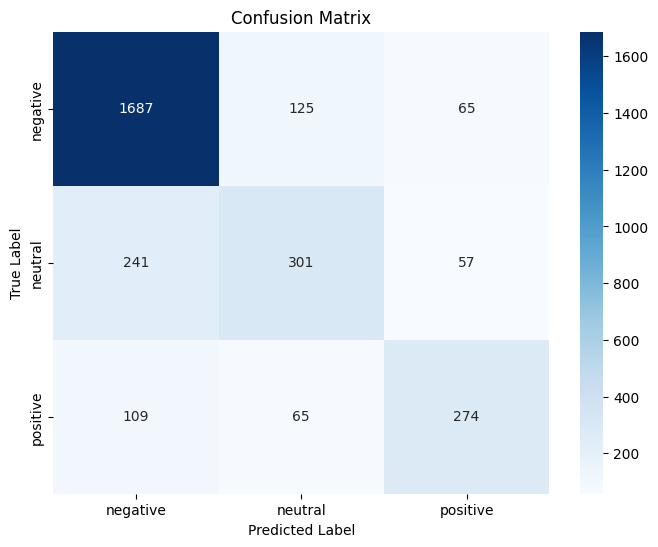

In [29]:
# Confusion Matrix
classes = best_model.classes_
cm = confusion_matrix(y_test, y_pred, labels=classes)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

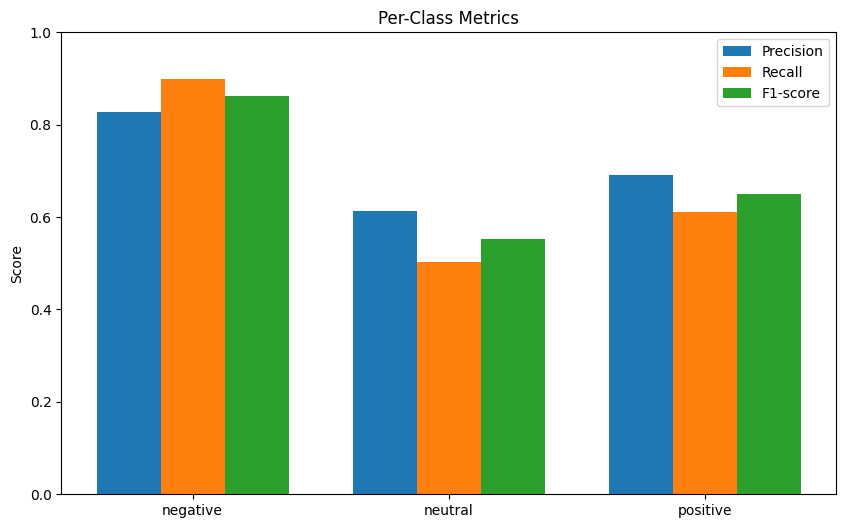

In [30]:
# Precision, Recall, F1-score per class
precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred, labels=classes)
x = np.arange(len(classes))
width = 0.25

plt.figure(figsize=(10,6))
plt.bar(x - width, precision, width, label='Precision')
plt.bar(x, recall, width, label='Recall')
plt.bar(x + width, f1, width, label='F1-score')

plt.xticks(x, classes)
plt.ylim(0, 1)
plt.ylabel('Score')
plt.title('Per-Class Metrics')
plt.legend()
plt.show()

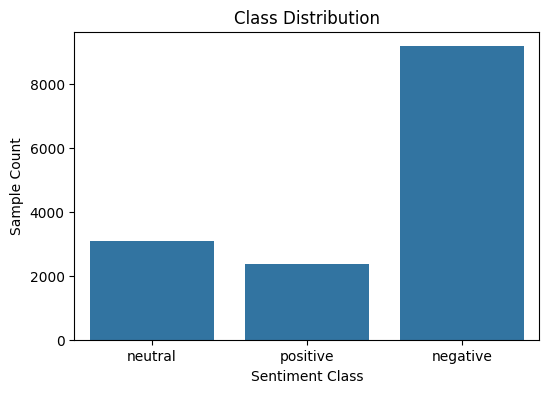

In [31]:
# Class distribution plot
plt.figure(figsize=(6,4))
sns.countplot(x=y)
plt.title('Class Distribution')
plt.xlabel('Sentiment Class')
plt.ylabel('Sample Count')
plt.show()

In [32]:
# Print class distribution
print(f"Training sample count: {X_train.shape[0]}")
print(f"Testing sample count: {X_test.shape[0]}")
print("Training set class distribution:\n", y_train.value_counts())
print("Testing set class distribution:\n", y_test.value_counts())

Training sample count: 11694
Testing sample count: 2924
Training set class distribution:
 airline_sentiment
negative    7295
neutral     2487
positive    1912
Name: count, dtype: int64
Testing set class distribution:
 airline_sentiment
negative    1877
neutral      599
positive     448
Name: count, dtype: int64
